<a href="https://colab.research.google.com/github/AlexK2003/Class-Assignments/blob/main/CS%204410/EX%2015%208/EX_15_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#15.8
(Classification with the Iris Dataset: Hyperparameter Tuning) Using scikit-learn’s
KFold class and cross_val_score function, determine the optimal k value for classifying
Iris samples using a KNeighborsClassifier.

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

knn = KNeighborsClassifier()

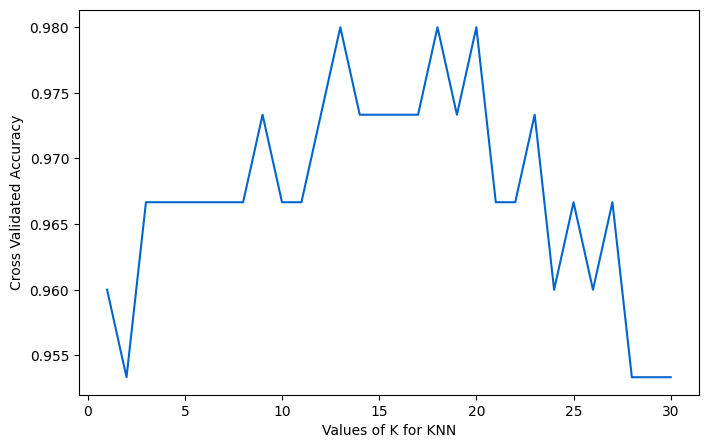

In [27]:




k_range = range(1, 31)

scores_mean = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X=iris.data, y=iris.target, cv=10)
    scores_mean.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_range, scores_mean, linestyle="-", color=plt.cm.winter(0.4), label="Accuracy")


plt.xlabel("Values of K for KNN")
plt.ylabel("Cross Validated Accuracy")
plt.show()

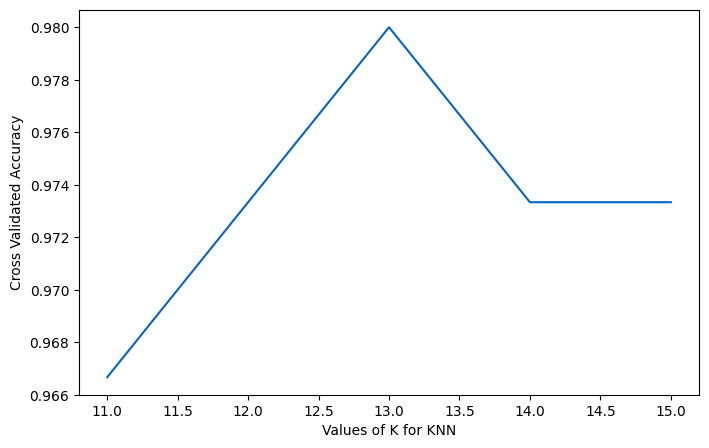

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Define K values from 11 to 15
k_range = range(11, 16)  # Includes 15
scores_mean = []

# Loop through different K values
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X=iris.data, y=iris.target, cv=10)
    scores_mean.append(scores.mean())

# Plot using the same style as the previous graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores_mean, linestyle="-", color=plt.cm.winter(0.4), label="Accuracy")

# Labels and Title
plt.xlabel("Values of K for KNN")
plt.ylabel("Cross Validated Accuracy")

# Set x-ticks every 0.5
plt.xticks(np.arange(11, 15.1, step=0.5))

# Show the plot
plt.show()


Confirming k-13 is optimal:

In [32]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {"n_neighbors": range(1, 31)}

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")

grid_search.fit(iris.data, iris.target)
best_k = grid_search.best_params_["n_neighbors"]
best_score = grid_search.best_score_

print(best_k)
print(best_score)

13
0.9800000000000001
